# Open network models generation

## Exponential network

We now want to build an exponential network with no preferential attachment effects.

In [1]:
import networkx as nx
import scipy as sp
import numpy as np
from tqdm.notebook import trange

N = int(5e3)  # number of nodes/steps
M = 4  # links per step


A = sp.sparse.lil_matrix((N, N), dtype=int)

for ind in trange(M+1, N):
    rr = np.random.permutation(ind-1)
    A[ind, rr[:M]] = 1
    A[rr[:M], ind] = 1

Net = nx.from_scipy_sparse_array(A)

  0%|          | 0/4995 [00:00<?, ?it/s]

Let's study some statistics about it.

In [2]:
K = [d for n, d in Net.degree()]

BC = nx.betweenness_centrality(Net)

Text(0, 0.5, 'Counts (log scale)')

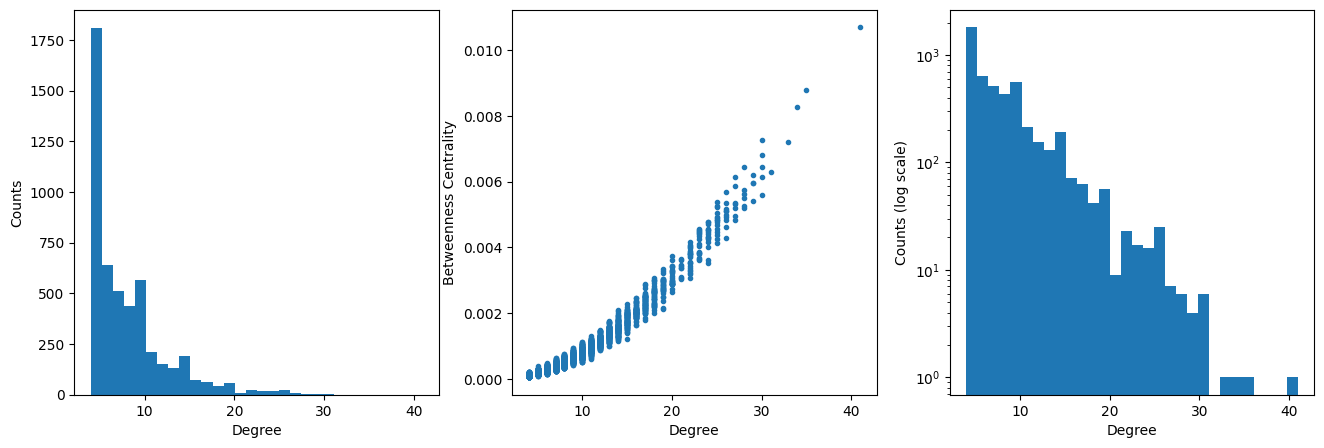

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].hist(K[1:], bins=30)
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Counts')
ax[1].plot(K[1:], list(BC.values())[1:], '.')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Betweenness Centrality')
ax[2].set_yscale('log')
ax[2].hist(K[1:], bins=30)
ax[2].set_xlabel('Degree')
ax[2].set_ylabel('Counts (log scale)')

## "B-A" Barabasi-Alberts model

Let's now see what happens with preferential attachment. 

In *networkx* one can easily generate a Barabasi-Alberts network with a dedicated function.
We can see how the Degree is distributed according a power law.

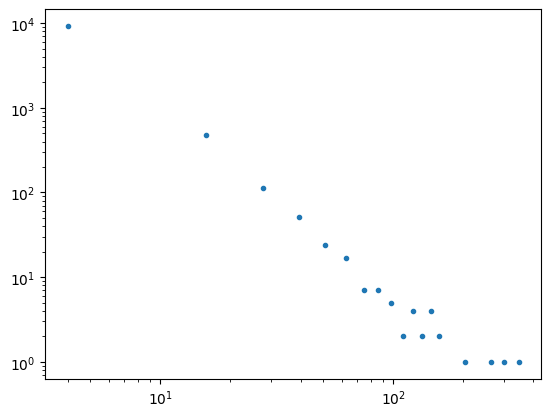

In [9]:
Net = nx.barabasi_albert_graph(N, M)

K = [d for n, d in Net.degree()]


fig, ax = plt.subplots()
Y, X, patches = ax.hist(K[1:], bins=30)
X = np.delete(X, -1)
ax.cla()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X[Y > 0], Y[Y > 0], '.')

In [10]:
BC = nx.betweenness_centrality(Net)

Moreover, we can see that despite this is a Barabasi-Alberts network, the relationship between Betweenness Centrality and Degree remains quadratic.

Text(0, 0.5, 'Betweenness Centrality (log scale)')

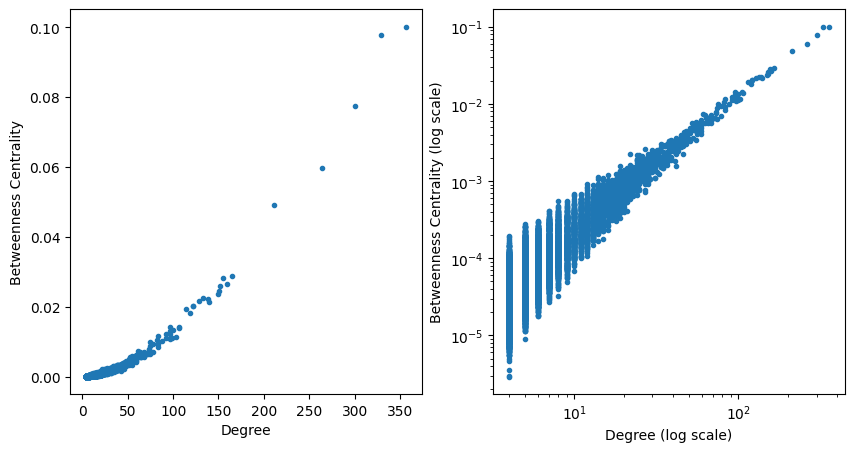

In [13]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(K, list(BC.values()), '.')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Betweenness Centrality')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].plot(K, list(BC.values()), '.')
ax[1].set_xlabel('Degree (log scale)')
ax[1].set_ylabel('Betweenness Centrality (log scale)')